In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
import numpy as np
import plotly.graph_objects as go
import spacy
import nltk
warnings.filterwarnings('ignore')

In [46]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
df1 = pd.read_csv('/content/drive/MyDrive/Sample 2_Airbnb_listings.csv')
df_listings=pd.DataFrame(df1,columns=['id','accommodates','price','amenities','neighbourhood_cleansed','review_scores_rating'])
def format_price(colnm):
  return int(float(colnm.replace('$','').replace(',','')))
df_listings['price']=df_listings['price'].apply(format_price)
df_listings.head()

,id,accommodates,price,amenities,neighbourhood_cleansed,review_scores_rating
0,43920083,5,128,"[""Board games"", ""Kitchen"", ""Baby bath"", ""Dishw...",Lambeth,100.0
1,15262253,1,70,"[""Kitchen"", ""Host greets you"", ""Hangers"", ""Fir...",Westminster,91.0
2,392246,2,39,"[""Dishwasher"", ""Kitchen"", ""Bed linens"", ""Hange...",Greenwich,99.0
3,30054179,3,85,"[""TV"", ""Essentials"", ""Kitchen"", ""Free parking ...",Lambeth,NaN
4,29098736,1,40,"[""Washer \u2013\u00a0In unit"", ""Bed linens"", ""...",Wandsworth,100.0


In [83]:
y=df_listings[df_listings['id']==14300858]
y

,id,accommodates,price,amenities,neighbourhood_cleansed,review_scores_rating
10749,14300858,4,67,"[""Kitchen"", ""Bed linens"", ""Hangers"", ""Smart lo...",Kensington and Chelsea,89.0


In [49]:
df_listings.shape

(30000, 6)

In [50]:
df_listings['neighbourhood_cleansed']

0                       Lambeth
1                   Westminster
2                     Greenwich
3                       Lambeth
4                    Wandsworth
                  ...          
29995    Kensington and Chelsea
29996                 Southwark
29997                    Ealing
29998    Kensington and Chelsea
29999                   Hackney
Name: neighbourhood_cleansed, Length: 30000, dtype: object

In [51]:
df_listings.dtypes

id                          int64
accommodates                int64
price                       int64
amenities                  object
neighbourhood_cleansed     object
review_scores_rating      float64
dtype: object

In [52]:
df_listings.isnull().sum()
df_listings= df_listings.fillna(0)


In [53]:
amen = df_listings['amenities'].unique()
import ast
def Lis(x):
    arr = ast.literal_eval(x)
    return arr

Lis("['Hello']")

df_listings['amen_as_list'] = df_listings['amenities'].apply(Lis)
df_listings['amen_as_list']
amenities = {}

for i in df_listings['amen_as_list'].index:
    for j in range(len(df_listings['amen_as_list'][i])):
        if(df_listings['amen_as_list'][i][j] not in amenities):
            amenities[(df_listings['amen_as_list'][i][j])] = 1
        else:
            amenities[(df_listings['amen_as_list'][i][j])] += 1
amenities

{'Board games': 53,
 'Kitchen': 27029,
 'Baby bath': 282,
 'Dishwasher': 7000,
 'Bed linens': 10568,
 'Dining table': 471,
 'Hangers': 23232,
 'Private entrance': 7194,
 'Fire extinguisher': 9665,
 'Bathtub': 2972,
 'Long term stays allowed': 24727,
 'Wine glasses': 436,
 'Wifi': 28564,
 'Carbon monoxide alarm': 17390,
 'Heating': 27857,
 'Essentials': 27355,
 'Washer': 25071,
 'Microwave': 10419,
 'Hair dryer': 19899,
 'Freezer': 1103,
 'Dedicated workspace': 18146,
 'Hot water kettle': 706,
 'Refrigerator': 12387,
 'Iron': 22226,
 'Conditioner': 647,
 'Extra pillows and blankets': 5203,
 'Cooking basics': 11334,
 'Mini fridge': 239,
 'Cleaning before checkout': 862,
 'Oven': 10933,
 'Shampoo': 19150,
 'Hot water': 16991,
 'Lockbox': 3482,
 'Dishes and silverware': 12207,
 'Stove': 9850,
 'Crib': 1248,
 'Shower gel': 2496,
 'TV': 17471,
 'Cleaning products': 484,
 'Luggage dropoff allowed': 4374,
 'Cable TV': 4409,
 'Children’s books and toys for ages 0-2 years old, 2-5 years old, 5-1

In [54]:
#new_dict = [(key, value) for value, key in amenities.items()]
#dict(new_dict)
new_amen = sorted(amenities.items(), key = lambda x: x[1])

In [55]:
new_amen[-25:]


[('First aid kit', 9446),
 ('Fire extinguisher', 9665),
 ('Stove', 9850),
 ('Microwave', 10419),
 ('Bed linens', 10568),
 ('Oven', 10933),
 ('Cooking basics', 11334),
 ('Dishes and silverware', 12207),
 ('Refrigerator', 12387),
 ('Dryer', 12922),
 ('Hot water', 16991),
 ('Carbon monoxide alarm', 17390),
 ('TV', 17471),
 ('Dedicated workspace', 18146),
 ('Shampoo', 19150),
 ('Hair dryer', 19899),
 ('Iron', 22226),
 ('Hangers', 23232),
 ('Long term stays allowed', 24727),
 ('Washer', 25071),
 ('Smoke alarm', 25447),
 ('Kitchen', 27029),
 ('Essentials', 27355),
 ('Heating', 27857),
 ('Wifi', 28564)]

In [56]:
newDict = []
for i in range(15,25):
    newDict.append(new_amen[-50:][i][0])
newDict

['Luggage dropoff allowed',
 'Cable TV',
 'Host greets you',
 'Lock on bedroom door',
 'Extra pillows and blankets',
 'Free parking on premises',
 'Elevator',
 'Coffee maker',
 'Dishwasher',
 'Private entrance']

In [57]:
dnew = pd.DataFrame()
dnew['scores'] = df_listings['review_scores_rating']
dnew=dnew.fillna(dnew.mean())
dnew

,scores
0,100.0
1,91.0
2,99.0
3,0.0
4,100.0
...,...
29995,80.0
29996,98.0
29997,89.0
29998,94.0


In [58]:
for i in newDict:
    dnew[i] = 0

dnew

,scores,Luggage dropoff allowed,Cable TV,Host greets you,Lock on bedroom door,Extra pillows and blankets,Free parking on premises,Elevator,Coffee maker,Dishwasher,Private entrance
0,100.0,0,0,0,0,0,0,0,0,0,0
1,91.0,0,0,0,0,0,0,0,0,0,0
2,99.0,0,0,0,0,0,0,0,0,0,0
3,0.0,0,0,0,0,0,0,0,0,0,0
4,100.0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29995,80.0,0,0,0,0,0,0,0,0,0,0
29996,98.0,0,0,0,0,0,0,0,0,0,0
29997,89.0,0,0,0,0,0,0,0,0,0,0
29998,94.0,0,0,0,0,0,0,0,0,0,0


In [59]:
for i in df_listings['amen_as_list'].index:
    for j in range(len(df_listings['amen_as_list'][i])):
        if df_listings['amen_as_list'][i][j] in newDict:
            dnew[df_listings['amen_as_list'][i][j]][i] = 1

dnew

,scores,Luggage dropoff allowed,Cable TV,Host greets you,Lock on bedroom door,Extra pillows and blankets,Free parking on premises,Elevator,Coffee maker,Dishwasher,Private entrance
0,100.0,1,1,0,0,1,0,0,0,1,1
1,91.0,1,0,1,1,0,0,1,0,0,0
2,99.0,1,0,0,0,1,1,0,0,1,0
3,0.0,0,0,0,1,0,1,0,0,0,0
4,100.0,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29995,80.0,0,0,0,0,0,0,0,0,0,1
29996,98.0,0,0,0,0,0,1,1,0,0,0
29997,89.0,0,0,0,1,0,0,0,0,0,0
29998,94.0,0,0,0,0,1,0,0,0,0,0


In [60]:
from sklearn.ensemble import ExtraTreesClassifier
etf = ExtraTreesClassifier()

X = dnew.drop(labels = ['scores'], axis = 1)
y = dnew['scores']

etf.fit(X, y)

ExtraTreesClassifier()

In [61]:
feature_importance = etf.feature_importances_
feature_importance

array([0.09300018, 0.07190178, 0.14053062, 0.07183511, 0.11033252,
       0.07203926, 0.07544698, 0.19217642, 0.10419441, 0.06854272])

In [62]:
for i in range(10):
    feature_importance[i] = feature_importance[i]*100

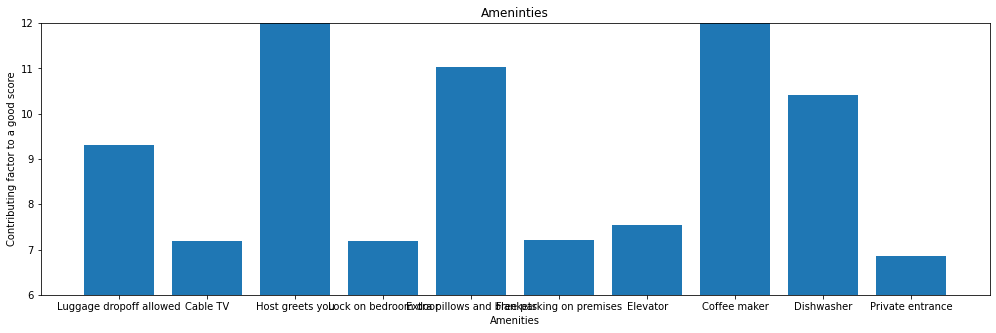

In [63]:
fig = plt.figure(figsize=(17, 5))
plt.ylim(6,12)
plt.bar(newDict, feature_importance)
plt.xlabel('Amenities')
plt.ylabel('Contributing factor to a good score')
plt.title('Ameninties')
plt.show()

In [64]:
#remove the NAN values 
df_listings.dropna(how='any',inplace=True)
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      30000 non-null  int64  
 1   accommodates            30000 non-null  int64  
 2   price                   30000 non-null  int64  
 3   amenities               30000 non-null  object 
 4   neighbourhood_cleansed  30000 non-null  object 
 5   review_scores_rating    30000 non-null  float64
 6   amen_as_list            30000 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 1.8+ MB


In [65]:
df_listings=df_listings[(df_listings['accommodates']<=4)]  
df_listings = df_listings[df_listings['neighbourhood_cleansed'].isin(['Kensington and Chelsea', 'Westminster'])]
df_listings

,id,accommodates,price,amenities,neighbourhood_cleansed,review_scores_rating,amen_as_list
1,15262253,1,70,"[""Kitchen"", ""Host greets you"", ""Hangers"", ""Fir...",Westminster,91.0,"[Kitchen, Host greets you, Hangers, Fire extin..."
5,38738454,4,200,"[""Dishwasher"", ""Kitchen"", ""Bed linens"", ""Hange...",Kensington and Chelsea,100.0,"[Dishwasher, Kitchen, Bed linens, Hangers, Bat..."
6,4815852,2,57,"[""Essentials"", ""Kitchen"", ""Washer"", ""Elevator""...",Westminster,90.0,"[Essentials, Kitchen, Washer, Elevator, Long t..."
12,3338480,2,80,"[""Essentials"", ""Kitchen"", ""Washer"", ""Hair drye...",Westminster,99.0,"[Essentials, Kitchen, Washer, Hair dryer, Hang..."
14,356978,2,42,"[""TV"", ""Essentials"", ""Kitchen"", ""Paid parking ...",Westminster,89.0,"[TV, Essentials, Kitchen, Paid parking off pre..."
...,...,...,...,...,...,...,...
29974,34269677,1,75,"[""Extra pillows and blankets"", ""Essentials"", ""...",Westminster,100.0,"[Extra pillows and blankets, Essentials, TV, K..."
29982,45452509,4,50,"[""Kitchen"", ""Hangers"", ""Private entrance"", ""Lo...",Westminster,100.0,"[Kitchen, Hangers, Private entrance, Long term..."
29991,887283,2,80,"[""Kitchen"", ""Host greets you"", ""Bed linens"", ""...",Kensington and Chelsea,93.0,"[Kitchen, Host greets you, Bed linens, Hangers..."
29995,39646622,2,112,"[""Essentials"", ""Kitchen"", ""Washer"", ""Hair drye...",Kensington and Chelsea,80.0,"[Essentials, Kitchen, Washer, Hair dryer, Hang..."


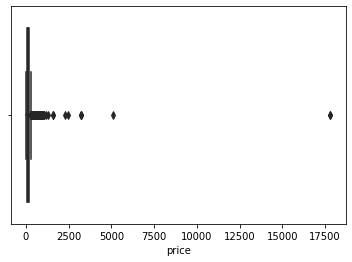

In [66]:
boxplot = sns.boxplot(x='price',data=df_listings,color='green')

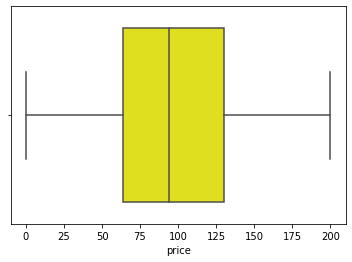

In [67]:

df_listings_boxplot = df_listings[df_listings['price'] <= 200]

boxplot2 = sns.boxplot(x='price', data=df_listings_boxplot, color='yellow')


In [68]:
df_listings.price.quantile([0.25,0.5,0.75,1])

0.25       69.0
0.50      100.0
0.75      159.0
1.00    17806.0
Name: price, dtype: float64

In [69]:
df_listings=df_listings[df_listings['price'].between(69,159)]
df_listings.shape[0]

2267

In [70]:
import json
df_listings['amenities_list'] = df_listings['amenities'].apply(lambda y: json.dumps(y))
df_listings[['amenities','amenities_list']].head()


,amenities,amenities_list
1,"[""Kitchen"", ""Host greets you"", ""Hangers"", ""Fir...","""[\""Kitchen\"", \""Host greets you\"", \""Hangers\..."
12,"[""Essentials"", ""Kitchen"", ""Washer"", ""Hair drye...","""[\""Essentials\"", \""Kitchen\"", \""Washer\"", \""H..."
26,"[""TV"", ""Essentials"", ""Kitchen"", ""Washer"", ""Han...","""[\""TV\"", \""Essentials\"", \""Kitchen\"", \""Washe..."
37,"[""Dishwasher"", ""Kitchen"", ""Hangers"", ""Long ter...","""[\""Dishwasher\"", \""Kitchen\"", \""Hangers\"", \""..."
39,"[""Dishwasher"", ""Kitchen"", ""Bed linens"", ""Hange...","""[\""Dishwasher\"", \""Kitchen\"", \""Bed linens\"",..."


In [71]:
import json

def parse_amenities(amenities_json):
    amenities = json.loads(amenities_json)
    return amenities

df_listings['amenities_list'] = df_listings['amenities'].apply(parse_amenities)
df_listings[['amenities', 'amenities_list']].head()


,amenities,amenities_list
1,"[""Kitchen"", ""Host greets you"", ""Hangers"", ""Fir...","[Kitchen, Host greets you, Hangers, Fire extin..."
12,"[""Essentials"", ""Kitchen"", ""Washer"", ""Hair drye...","[Essentials, Kitchen, Washer, Hair dryer, Hang..."
26,"[""TV"", ""Essentials"", ""Kitchen"", ""Washer"", ""Han...","[TV, Essentials, Kitchen, Washer, Hangers, Fir..."
37,"[""Dishwasher"", ""Kitchen"", ""Hangers"", ""Long ter...","[Dishwasher, Kitchen, Hangers, Long term stays..."
39,"[""Dishwasher"", ""Kitchen"", ""Bed linens"", ""Hange...","[Dishwasher, Kitchen, Bed linens, Hangers, Pri..."


In [72]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
amenities_binary=mlb.fit_transform(df_listings['amen_as_list'])
amenities_binary

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [73]:
x_data=pd.DataFrame(amenities_binary , columns=mlb.classes_,index=df_listings.id)
x_data.head()

,"43"" HDTV with Amazon Prime Video, Netflix, standard cable","44"" HDTV with Netflix, Amazon Prime Video, Chromecast, standard cable","46"" HDTV with Netflix","50"" HDTV with Netflix",Air conditioning,Amazon Echo sound system with Bluetooth and aux,BBQ grill,BOSE sound system,Baby bath,Baby monitor,...,Toaster,Trash compactor,Washer,Washer – In unit,Waterfront,Wifi,Wifi – 45 Mbps,Wifi – 50 Mbps,Window guards,Wine glasses
id,,,,,,,,,,,,,,,,,,,,,
15262253,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3338480,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
44129583,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
13970915,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
43067160,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [74]:
x_final=x_data[x_data.columns[x_data.sum()>x_data.sum().mean()]]
df_amenities=pd.DataFrame(x_final.sum())
df_amenities.columns=['counts']
from sklearn.cluster import KMeans
s=KMeans(n_clusters=4).fit_predict(df_amenities['counts'].values.reshape(-1,1))
df_amenities['availability_cluster']=s
df_amenities=df_amenities.sort_values(by=['availability_cluster','counts'],ascending=False)
df_amenities


,counts,availability_cluster
Shampoo,1675,3
TV,1555,3
Dedicated workspace,1516,3
Hot water,1329,3
Carbon monoxide alarm,1286,3
First aid kit,616,2
Private entrance,610,2
Elevator,568,2
Dishwasher,566,2
Coffee maker,558,2


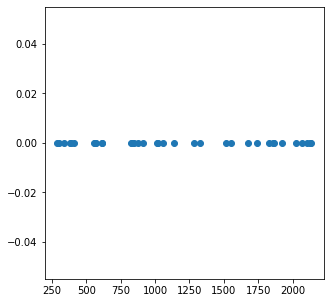

In [75]:
plt.figure(figsize=(5,5))
plt.scatter(df_amenities['counts'], np.zeros(df_amenities.shape[0]))
plt.show()


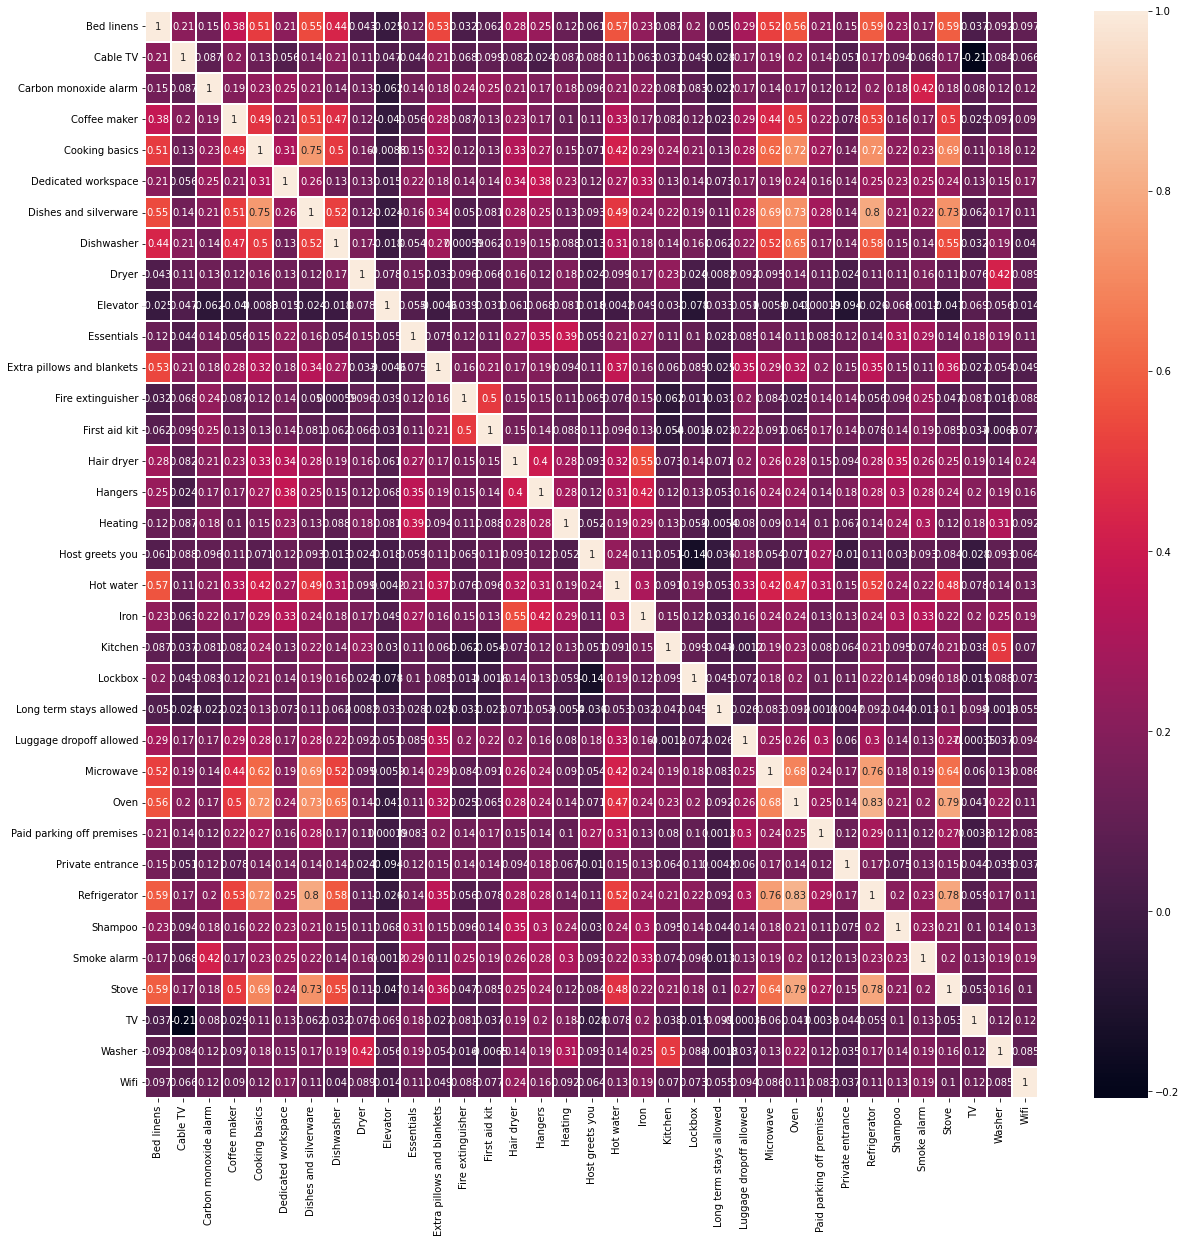

In [76]:
corr=x_final.corr()
fig=plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,linewidths=1)
plt.show()

In [78]:
xx=x_final.copy()
xx['lessential_amen']=xx['Wifi']+xx['Heating']+xx['Essentials']+xx['Kitchen']+xx['Smoke alarm']+xx['Washer']+xx['Long term stays allowed']+xx['Hangers']
xx['2common_amen']=xx['Iron']+xx['Shampoo']+xx['Hair dryer']+xx['Dedicated workspace']+xx['Carbon monoxide alarm']+xx['TV']
xx['3upgraded_amen']=xx['Refrigerator']+xx['Dishes and silverware']+xx['Cooking basics']+xx['Oven']+xx['Microwave']+xx['Stove']+xx['Dryer']+xx['Bed linens']+xx['First aid kit']+xx['Fire extinguisher']
xx['4other_amen']=xx['Private entrance']++xx['Elevator']+xx['Coffee maker']+xx['Host greets you']
cols=['lessential_amen','2common_amen','3upgraded_amen','4other_amen']
x_reduce=pd.DataFrame(xx,columns=cols)
x_reduce.head()






,lessential_amen,2common_amen,3upgraded_amen,4other_amen
id,,,,
15262253,8,5,3,2
3338480,7,4,1,1
44129583,8,3,2,0
13970915,8,5,6,0
43067160,8,5,10,2


        lessential_amen 2common_amen 3upgraded_amen 4other_amen
                   mean         mean           mean        mean
cluster                                                        
0              6.653160     3.623177       1.367909    0.589951
1              7.645692     4.969022       7.214908    1.265247
Empty DataFrame
Columns: [id, lessential_amen, 2common_amen, 3upgraded_amen, 4other_amen, cluster]
Index: []


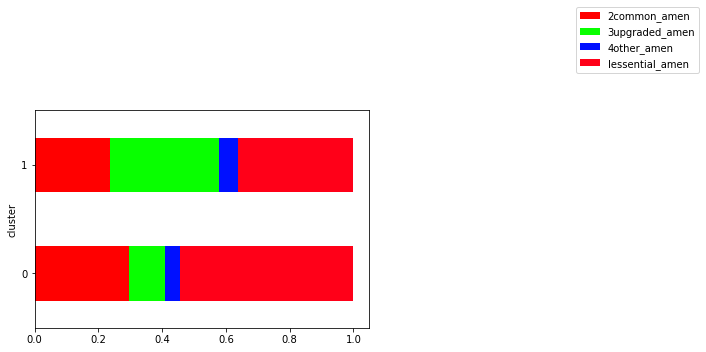

In [84]:
x_final=x_reduce 
from sklearn.cluster import KMeans
x_final.loc[:,'cluster']=KMeans(n_clusters=2).fit_predict(x_final)
pivot_cluster=x_final.pivot_table(index=['cluster'],aggfunc='sum')
pivot_cluster_percentage=pivot_cluster.div(pivot_cluster.sum(axis=1),axis=0)
pivot_cluster_percentage
pivot_cluster_percentage.plot(kind='barh',stacked=True,colormap='hsv')
plt.legend(pivot_cluster_percentage, bbox_to_anchor=(1,0.5,1,1))
x_final=x_final.reset_index()
print(x_final.groupby('cluster')[cols].agg(['mean']))
print(x_final[x_final['id']==y['id'].values[0]])

In [93]:
df2=pd.read_csv('/content/drive/MyDrive/bnb_reviews.csv')
df2=df2[~df2['comments'].isna()]
df2=df2[df2['listing_id'].isin(df_listings['id'])]
df2.to_csv('/content/drive/MyDrive/bnb_reviews.csv')

In [94]:
from nltk.stem.snowball import stopwords
import nltk
nltk.download('stopwords')
all_comments=df2['comments'].values
cmts=''
for c in all_comments:
  c=c.lower()
  cmts+=c+''
for ch in '!@#$%^&*,/\][{}|~`><-_;:':
  cmts=cmts.replace(ch,"")
words=cmts.split()
counts={}
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords=stopwords.words('english')
for word in words:
  if word not in stopwords:
    counts[word]=counts.get(word,0)+1
items = list(counts.items())
items.sort(key=lambda x:x[1],reverse=True)

items=pd.DataFrame(items)
items=items.rename(columns={0:'Word',1:'Counts'})
items.to_csv('/content/drive/MyDrive/bnb_reviews.csv')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [95]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
scorer=SentimentIntensityAnalyzer()
comments=df2.comments
def calculate_sentiment(comments):
  return(scorer.polarity_scores(comments)['compound'])
df2.loc[:, 'sentiment'] = df2['comments'].apply(lambda x: calculate_sentiment(x))
reviews=df2.copy()
df2=df2[['listing_id','sentiment']]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [96]:
df2=df2.groupby('listing_id')['sentiment'].agg(['mean']).reset_index()
df2=df2.rename(columns={'mean':'sentiment_score'})

In [97]:
neg=reviews[reviews['sentiment']<0]
neg['comments'].to_csv('/content/drive/MyDrive/bnb_reviews.csv')

In [98]:
print(df2[df2['listing_id']==y['id'].values[0]])
print(df2['sentiment_score'].mean())
print(df2['sentiment_score'].max())
print(df2['sentiment_score'].min())
print(df2['sentiment_score'].std())

      listing_id  sentiment_score
3463    14300858         0.637159
0.7164963625265971
0.998
-0.9914
0.30551402178182036


<function matplotlib.pyplot.show(*args, **kw)>

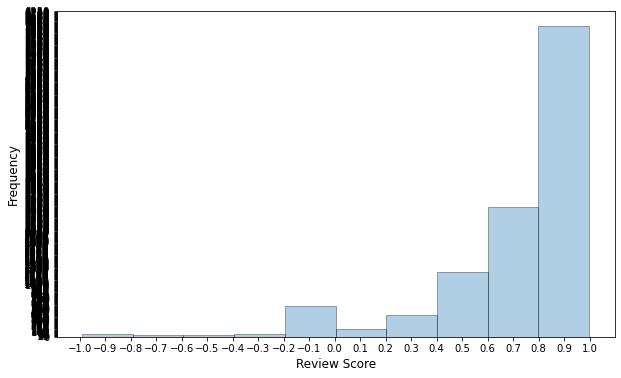

In [99]:
from matplotlib.pyplot import MultipleLocator
plt.figure(figsize=(10,6))
plt.hist(df2['sentiment_score'], edgecolor='k', alpha=0.35)
x_major_locator=MultipleLocator(0.1)
y_major_locator=MultipleLocator(10)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.ylabel('Frequency',fontsize=12)
plt.xlabel('Review Score',fontsize=12)
plt.show

In [100]:
df_score=pd.merge(x_final,df2,left_on='id',right_on='listing_id')
df_score

,id,lessential_amen,2common_amen,3upgraded_amen,4other_amen,cluster,listing_id,sentiment_score
0,15262253,8,5,3,2,0,15262253,0.947300
1,3338480,7,4,1,1,0,3338480,0.000000
2,13970915,8,5,6,0,1,13970915,0.891625
3,26148028,6,4,2,1,0,26148028,0.960350
4,3552939,7,3,2,0,0,3552939,0.939500
...,...,...,...,...,...,...,...,...
928,21131185,7,6,9,2,1,21131185,0.593000
929,21018261,7,4,7,2,1,21018261,0.200600
930,41658339,8,5,10,1,1,41658339,0.836000
931,26518523,7,5,1,1,0,26518523,0.991800


In [101]:
df_score.groupby('cluster')['sentiment_score'].agg(['mean']).reset_index()

,cluster,mean
0,0,0.666972
1,1,0.710363


In [102]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [103]:
Y=df_score['sentiment_score']
X=df_score.drop(columns=['id','listing_id','sentiment_score','cluster'])
X=(X-X.min())/(X.max()-X.min())
X=X.assign(const=1)
model=sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        sentiment_score   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.017
Date:                Wed, 11 Jan 2023   Prob (F-statistic):             0.0900
Time:                        12:37:24   Log-Likelihood:                -331.76
No. Observations:                 933   AIC:                             673.5
Df Residuals:                     928   BIC:                             697.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
lessential_amen     0.0758      0.104     

In [110]:
y_index=x_final[x_final['id']==y['id'].values[0]].index
y_=(x_final-x_final.min())/(x_final.max()-x_final.min())
y_=y_.loc[y_index,:]
yp=y_.values[0][1:-1]
yp=np.append(yp,1)
model.predict(yp)

IndexError: ignored

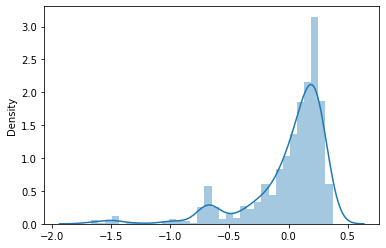

In [106]:
sns.distplot(model.resid)

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(exog=X.values,exog_idx=i)for i in range(X.shape[1])]
vif_table=pd.DataFrame({'coef_name':X.columns,'vif':np.around(vif,3)})
print(vif_table)

         coef_name     vif
0  lessential_amen   1.331
1     2common_amen   1.362
2   3upgraded_amen   1.401
3      4other_amen   1.191
4            const  56.330


In [108]:
#Price Listing by Neighborhood
df_neighbourhood = pd.DataFrame(df_listings.groupby('neighbourhood_cleansed').mean()['price'].sort_values(ascending=False))
df_neighbourhood = df_neighbourhood.rename(columns = {'price': 'mean_price'})
top_10 = df_neighbourhood.index[:10].tolist()
df_neighbourhood.head(10)

,mean_price
neighbourhood_cleansed,
City of London,201.936709
Westminster,185.473355
Kensington and Chelsea,183.262529
Camden,138.333172
Islington,132.304448
Richmond upon Thames,131.351770
Hammersmith and Fulham,125.505132
Merton,107.208768
Wandsworth,106.657395


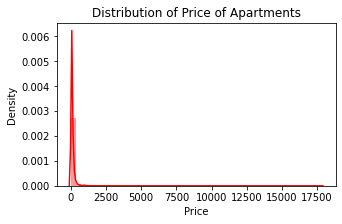

In [109]:
plt.figure(figsize=(5,3))
sns.distplot(df_listings.price,color='r')
plt.xlabel("Price")
plt.title("Distribution of Price of Apartments")
plt.show()